**Author: Bhupender Kumar Saini**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np 
from scipy.stats import sem, t
from scipy import mean
path='/content/drive/My Drive/Colab Notebooks/LatestData_July'

In [ ]:
# function for calcuting mean confidence interval 
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, +h, -h
def plot_roc(fpr,tpr,label):
    #  plot the roc curve for the model
    pyplot.plot(fpr, tpr, linestyle='--', label=label)

    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot 
    pyplot.show()
    return

In [ ]:
#Epoch 30 data , recorded previously SPACY
df_synonym_1= pd.read_csv(path+'/report_synonym_noisedidff_0.99_10fold_2.csv')
df_unlabel_1= pd.read_csv(path+'/report_synonym_unlabelledDifference_0.99_10fold_2.csv')
df_dropout_1= pd.read_csv(path+'/report_dropout_0.99_10fold_2.csv')
df_synonymand_dropout_1= pd.read_csv(path+'/report_synonymanddropout_0.99_10fold_2.csv')
df_labelprop= pd.read_csv(path+'/report_labelProp_0.99_10fold_2.csv')
df_supervised = pd.read_csv(path+'/report_supervised_0.99_10fold_2.csv')

epochs= 15
df_synonym_1 = df_synonym_1[df_synonym_1['Epoch']==epochs]
df_unlabel_1 = df_unlabel_1[df_unlabel_1['Epoch']==epochs]
df_dropout_1 = df_dropout_1[df_dropout_1['Epoch']==epochs]
df_synonymand_dropout_1 = df_synonymand_dropout_1[df_synonymand_dropout_1['Epoch']==epochs]
df_supervised = df_supervised[df_supervised['Epoch']==epochs]


df_synonym_1=df_synonym_1.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date', 'Ratio'], axis = 1) 
df_synonym_1= df_synonym_1.reset_index(drop= True)
df_synonymand_dropout_1=df_synonymand_dropout_1.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date','Ratio'], axis = 1) 
df_synonymand_dropout_1= df_synonymand_dropout_1.reset_index(drop= True)
df_dropout_1=df_dropout_1.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date','Ratio'], axis = 1) 
df_dropout_1= df_dropout_1.reset_index(drop= True)
df_unlabel_1=df_unlabel_1.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date','Ratio'], axis = 1) 
df_unlabel_1= df_unlabel_1.reset_index(drop= True)
df_supervised=df_supervised.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date','Ratio'], axis = 1) 
df_supervised= df_supervised.reset_index(drop= True)
df_labelprop=df_labelprop.drop(['Alpha','Batch_Size','Learning Rate','Train_Accuracy','comment','Date','Ratio'], axis = 1) 
df_labelprop= df_labelprop.reset_index(drop= True)
df_unlabel_1

In [ ]:
len=df_dropout_1['Epoch'].count()/2
len

10.0

# label propogation

In [ ]:
df_labelprop.groupby('Model').mean().sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Label Propogation,7.773508,NaN,0.548042,0.452506,0.49096,0.528288,0.621989,0.397175,0.505574


In [ ]:
std_error=df_labelprop.groupby('Model').sem()
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Label Propogation,0.065072,NaN,0.018468,0.033957,0.02599,0.034137,0.018837,0.037504,0.020725


# Supervised

In [ ]:
df_supervised.groupby('Model').mean().sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Supervised_BILSTM,0.773901,15,0.663671,0.706057,0.692681,0.69412,0.648991,0.728544,0.687612


In [ ]:
std_error=df_supervised.groupby('Model').sem()
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Supervised_BILSTM,0.092677,0.0,0.035254,0.021127,0.031403,0.046053,0.074289,0.050557,0.022571


# drop out

In [ ]:
df_dropout_1.groupby('Model').mean().sort_index(axis = 1) 

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.696626,15,0.674084,0.714558,0.726727,0.724582,0.666292,0.736668,0.703242
Teacher,0.557385,15,0.653467,0.728829,0.751890,0.691512,0.607504,0.785832,0.702015


In [ ]:
std_error=df_dropout_1.groupby('Model').sem()
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)


,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.063262,0.0,0.054021,0.033022,0.064895,0.065666,0.122499,0.106009,0.021501
Teacher,0.027313,0.0,0.052616,0.023505,0.064702,0.034117,0.104099,0.083452,0.011986


# unlabel data

In [ ]:
df_unlabel_1.groupby('Model').mean().sort_index(axis = 1) 

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.840551,15,0.637223,0.567604,0.594712,0.659299,0.711073,0.519478,0.611260
Teacher,0.584915,15,0.585382,0.641535,0.689980,0.629152,0.561434,0.695918,0.629765


In [ ]:
std_error=df_unlabel_1.groupby('Model').sem().sort_index(axis = 1) 
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.141302,0.0,0.035559,0.075898,0.061058,0.037347,0.112970,0.146711,0.027184
Teacher,0.026657,0.0,0.072658,0.103848,0.132730,0.033005,0.168902,0.221620,0.053338


# synonym and drop out

In [ ]:
df_synonymand_dropout_1.groupby('Model').mean().sort_index(axis = 1) 

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,1.136267,15,0.627583,0.639892,0.658181,0.704503,0.665080,0.636627,0.646141
Teacher,0.597719,15,0.602144,0.622924,0.674913,0.684509,0.612696,0.660740,0.636263


In [ ]:
std_error=df_synonymand_dropout_1.groupby('Model').sem()
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.175224,0.0,0.07697,0.053313,0.08671,0.085916,0.155365,0.135824,0.034884
Teacher,0.054198,0.0,0.06846,0.115457,0.09418,0.075804,0.166726,0.188931,0.042506


# synonym

In [ ]:
m=df_synonym_1.groupby('Model').mean().sort_index(axis = 1) 
m

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.746976,15,0.685935,0.703059,0.685518,0.709613,0.691596,0.701540,0.695453
Teacher,0.552150,15,0.674923,0.721937,0.710191,0.699707,0.649337,0.750072,0.702437


In [ ]:
std_error=df_synonym_1.groupby('Model').sem()
h = std_error * t.ppf((1 + 0.95) / 2., len-1)
h.sort_index(axis = 1)

,Classification_Loss,Epoch,F1_Score_Fake,F1_Score_True,Precision_Fake,Precision_True,Recall_Fake,Recall_True,Test_Accuracy
Model,,,,,,,,,
Student,0.116612,0.0,0.02409,0.028825,0.034939,0.034839,0.042853,0.047011,0.023916
Teacher,0.032637,0.0,0.03941,0.021863,0.032728,0.027142,0.062127,0.044747,0.021759


# Roc curve

In [ ]:
fpr_supervised= np.load(path+'/roc/fpr_supervised.npy',allow_pickle=True)
tpr_supervised= np.load(path+'/roc/tpr_supervised.npy',allow_pickle=True)

fpr_labelp= np.load(path+'/roc/fpr_labelp.npy',allow_pickle=True)
tpr_labelp= np.load(path+'/roc/tpr_labelp.npy',allow_pickle=True)

fpr_dropout= np.load(path+'/roc/fpr_dropouts.npy',allow_pickle=True)
tpr_dropout= np.load(path+'/roc/tpr_dropouts.npy',allow_pickle=True)

fpr_synonym= np.load(path+'/roc/fpr_synonym.npy',allow_pickle=True)
tpr_synonym= np.load(path+'/roc/tpr_synonym.npy',allow_pickle=True)

fpr_unlabel= np.load(path+'/roc/fpr_unlabel.npy',allow_pickle=True)
tpr_unlabel= np.load(path+'/roc/tpr_unlabel.npy',allow_pickle=True)

fpr_synonymNdropout= np.load(path+'/roc/fpr_synonymNdropout.npy',allow_pickle=True)
tpr_synonymNdropout= np.load(path+'/roc/tpr_synonymNdropout.npy',allow_pickle=True)

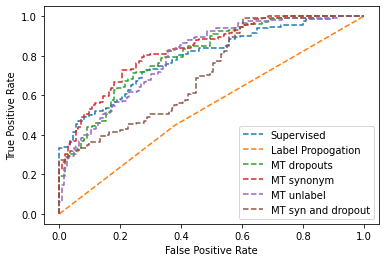

In [ ]:
pyplot.plot(fpr_supervised[0], tpr_supervised[0], linestyle='--', label='Supervised')
pyplot.plot(fpr_labelp[0], tpr_labelp[0], linestyle='--', label='Label Propogation')
pyplot.plot(fpr_dropout[1], tpr_dropout[1], linestyle='--', label='MT dropouts')
pyplot.plot(fpr_synonym[1], tpr_synonym[1], linestyle='--', label='MT synonym')
pyplot.plot(fpr_unlabel[1], tpr_unlabel[1], linestyle='--', label='MT unlabel')
pyplot.plot(fpr_synonymNdropout[1], tpr_synonymNdropout[1], linestyle='--', label='MT syn and dropout')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
    # show the plot 
pyplot.savefig(path+'/roc/roccurve.png')
pyplot.show()


In [ ]:
|# for epoch 15 , if you want other then sequence is 10,15,20,25,30
fpr_supervised[0]

array([0.        , 0.        , 0.        , 0.00900901, 0.00900901,
       0.02702703, 0.02702703, 0.03603604, 0.03603604, 0.04504505,
       0.04504505, 0.05405405, 0.05405405, 0.06306306, 0.06306306,
       0.08108108, 0.08108108, 0.0990991 , 0.0990991 , 0.10810811,
       0.10810811, 0.11711712, 0.11711712, 0.14414414, 0.14414414,
       0.15315315, 0.15315315, 0.17117117, 0.17117117, 0.18018018,
       0.18018018, 0.18918919, 0.18918919, 0.1981982 , 0.1981982 ,
       0.20720721, 0.20720721, 0.21621622, 0.21621622, 0.22522523,
       0.22522523, 0.23423423, 0.23423423, 0.24324324, 0.24324324,
       0.25225225, 0.25225225, 0.26126126, 0.26126126, 0.27027027,
       0.27027027, 0.27927928, 0.27927928, 0.2972973 , 0.2972973 ,
       0.32432432, 0.32432432, 0.35135135, 0.35135135, 0.36036036,
       0.36036036, 0.36936937, 0.36936937, 0.38738739, 0.38738739,
       0.40540541, 0.40540541, 0.42342342, 0.42342342, 0.45945946,
       0.45945946, 0.54054054, 0.54054054, 0.54954955, 0.54954